In [4]:
import os
from pathlib import Path
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

# Set Windows-style path output
os_sep = "\\"  # Force Windows path separator

def validate_and_split(b):
    clear_output()
    filepath = path_input.value.strip()
    
    if not filepath:
        display(HTML("<div style='color:red;font-weight:bold'>Error: Please enter a file path</div>"))
        return
    
    # Normalize path to Windows format
    filepath = filepath.replace("/", os_sep).replace("\\\\", os_sep)
    
    if not os.path.exists(filepath):
        display(HTML(f"""
        <div style='color:red;font-weight:bold'>File not found at:</div>
        <div style='color:red'><code>{filepath}</code></div>
        <div style='color:red'>Please verify:</div>
        <div style='color:red'>• File exists at this location</div>
        <div style='color:red'>• Path uses correct backslashes (C:\...)</div>
        <div style='color:red'>• No typos in filename</div>
        """))
        return

    sections = [
        "Pendahuluan/Landasan Teori",
        "Tinjauan Pustaka",
        "Metodologi/Metode penelitian",
        "Hasil/Pembahasan",
        "Kesimpulan/saran"
    ]

    try:
        with open(filepath, 'r', encoding='utf-8', errors='ignore') as f:
            content = f.read()
        
        split_content = {section: [] for section in sections}
        current_section = None
        
        for line in content.split('\n'):
            line = line.strip()
            for section in sections:
                if section.lower() in line.lower():  # Case-insensitive match
                    current_section = section
                    break
            
            if current_section and line:
                split_content[current_section].append(line)
        
        base_name = os.path.splitext(filepath)[0]
        output_files = []
        
        for section, lines in split_content.items():
            if lines:
                safe_section = section.replace("/", "_").replace(" ", "_")
                output_path = f"{base_name}_{safe_section}.txt"
                
                # Write file with explicit Windows line endings
                with open(output_path, 'w', encoding='utf-8', newline='\r\n') as f:
                    f.write('\n'.join(lines))
                
                if os.path.exists(output_path):
                    output_files.append(output_path)
        
        if output_files:
            display(HTML("<div style='color:green;font-weight:bold'>Success! Created files:</div>"))
            for file in output_files:
                display(HTML(f"""
                <div style='margin-left:20px'>
                • <code>{file}</code><br>
                <small>Size: {os.path.getsize(file):,} bytes | 
                Modified: {datetime.datetime.fromtimestamp(os.path.getmtime(file)).strftime('%Y-%m-%d %H:%M:%S')}</small>
                </div>
                """))
            
            display(HTML(f"""
            <div style='margin-top:20px;background:#f0f0f0;padding:10px'>
            <strong>File location:</strong><br>
            <code>{os.path.dirname(filepath)}</code>
            </div>
            """))
            
            # Create direct Windows Explorer link (for Jupyter in Windows)
            try:
                if os.name == 'nt':  # Windows only
                    from IPython.display import FileLink
                    display(FileLink(os.path.dirname(filepath), result_html_prefix="Open in Explorer: "))
            except:
                pass
            
        else:
            display(HTML("<div style='color:red;font-weight:bold'>No files were created. Possible issues:</div>"))
            display(HTML("""
            <div style='color:red'>
            1. No matching section headers found<br>
            2. File couldn't be written (permissions)<br>
            3. Input file has unexpected format
            </div>
            """))
    
    except Exception as e:
        display(HTML(f"""
        <div style='color:red;font-weight:bold'>Processing Error:</div>
        <div style='color:red'><code>{str(e)}</code></div>
        <div style='color:red'>Check file encoding or contents</div>
        """))

# UI with Windows path defaults
path_input = widgets.Text(
    value=r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
    placeholder='Enter Windows path (C:\\path\\to\\file.txt)',
    description='File path:',
    layout=widgets.Layout(width='90%'),
    style={'description_width': 'initial'}
)

run_button = widgets.Button(
    description='Split File (Windows)',
    button_style='success',
    icon='folder'
)
run_button.on_click(validate_and_split)

# Display
display(HTML("""
<h3>Windows File Splitter</h3>
<p>Splits text files at: <code>Pendahuluan/Landasan Teori, Tinjauan Pustaka, Metodologi, Hasil/Pembahasan, Kesimpulan/saran</code></p>
"""))
display(path_input)
display(run_button)


In [3]:
import os
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

def verify_and_split(b):
    """Main function to verify path and split file"""
    clear_output()  # Clear previous outputs
    filepath = path_input.value.strip()
    
    if not os.path.exists(filepath):
        display(HTML("<div style='color:red;font-weight:bold'>Error: File not found at:</div>"))
        display(HTML(f"<div style='color:red'><code>{filepath}</code></div>"))
        display(HTML("<div style='color:red'>Please check the path is correct and file exists.</div>"))
        return
    
    sections = [
        "Bab I",
        "Bab II", 
        "Bab III",
        "BAB IV",
        "BAB V",
        "Pendahuluan",
        "Landasan Teori",
        "Tinjauan Pustaka",
        "Metodologi",
        "Metode penelitian",
        "Hasil",
        "Pembahasan",
        "Kesimpulan",
        "saran"
    ]
    
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            content = f.read()
        
        split_content = {section: [] for section in sections}
        current_section = None
        
        for line in content.split('\n'):
            line = line.strip()
            # Check for section headers
            for section in sections:
                if line.lower().startswith(section.lower()):
                    current_section = section
                    break
            
            if current_section and line:
                split_content[current_section].append(line)
        
        # Get original filename without extension
        original_filename = os.path.splitext(os.path.basename(filepath))[0]
        output_files = []
        
        for section, lines in split_content.items():
            if lines:
                # Create safe section name for filename
                safe_section = section.replace("/", "_").replace(" ", "_")
                # Combine with original filename
                output_filename = f"{safe_section}_{original_filename}.txt"
                output_path = os.path.join(os.path.dirname(filepath), output_filename)
                
                # Save file with UTF-8 encoding
                with open(output_path, 'w', encoding='utf-8') as f:
                    f.write('\n'.join(lines))
                
                # Verify file was actually created
                if os.path.exists(output_path):
                    output_files.append(output_path)
        
        if output_files:
            display(HTML("<div style='color:green;font-weight:bold'>Successfully created files:</div>"))
            for file in output_files:
                display(HTML(f"• <code>{file}</code>"))
        else:
            display(HTML("<div style='color:red;font-weight:bold'>No output files were created. Possible issues:</div>"))
            display(HTML("<div style='color:red'>1. No matching section headers found<br>2. File couldn't be written (permissions)<br>3. Input file has unexpected format</div>"))
            
    except Exception as e:
        display(HTML(f"<div style='color:red;font-weight:bold'>Error:</div>"))
        display(HTML(f"<div style='color:red'>{str(e)}</div>"))

# UI Elements with default file path
path_input = widgets.Text(
    value=r'C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt',
    placeholder='Enter full file path',
    description='File Path:',
    layout=widgets.Layout(width='80%'),
    style={'description_width': 'initial'}
)

run_button = widgets.Button(
    description='Split File',
    button_style='success',
    tooltip='Click to process the file'
)

# Display everything
display(HTML("<h2>Text Document Splitter</h2>"))
display(HTML("<p>Splits documents into sections while preserving original filename</p>"))
display(widgets.HBox([path_input]))
display(run_button)
run_button.on_click(verify_and_split)

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import string
import re
import nltk
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from io import BytesIO
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

# Initialize NLP resources
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english')).union(set(stopwords.words('indonesian')))

def preprocess_text(text):
    """Clean and normalize text data"""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in text.split() 
              if word not in stop_words and len(word) > 3]
    return ' '.join(tokens)

def get_first_word(filename):
    """Extract the first distinct word from filename (skip year if present)"""
    stem = Path(filename).stem
    parts = [p for p in stem.split('_') if not p.isdigit()]
    return parts[0] if parts else stem[:15]

def generate_analysis_reports(texts, filenames, output_dir):
    """Generate both WordCount and TFIDF reports with proper visualization"""
    # Initialize both vectorizers
    count_vec = CountVectorizer()
    tfidf_vec = TfidfVectorizer()
    
    # Fit both models
    count_matrix = count_vec.fit_transform(texts)
    tfidf_matrix = tfidf_vec.fit_transform(texts)
    
    # Create workbooks
    wb_word = Workbook()
    wb_tfidf = Workbook()
    
    # Process each document
    for i, (text, filename) in enumerate(zip(texts, filenames)):
        # WordCount analysis
        ws_word = wb_word.create_sheet(title=filename[:30])
        count_scores = np.asarray(count_matrix[i].todense()).ravel()
        top_count_idx = count_scores.argsort()[::-1][:10]
        
        # TFIDF analysis
        ws_tfidf = wb_tfidf.create_sheet(title=filename[:30])
        tfidf_scores = np.asarray(tfidf_matrix[i].todense()).ravel()
        top_tfidf_idx = tfidf_scores.argsort()[::-1][:10]
        
        first_word = get_first_word(filename)
        
        # Add data and visualizations to both workbooks
        for ws, scores, top_idx, vec in [(ws_word, count_scores, top_count_idx, count_vec),
                                        (ws_tfidf, tfidf_scores, top_tfidf_idx, tfidf_vec)]:
            
            # Write headers
            ws['A1'] = 'Term'
            ws['B1'] = 'Score'
            
            # Write data
            for row, idx in enumerate(top_idx, start=2):
                ws.cell(row=row, column=1, value=vec.get_feature_names_out()[idx])
                ws.cell(row=row, column=2, value=scores[idx])
            
            # Create and add visualization
            plt.figure(figsize=(8, 4))
            terms = [vec.get_feature_names_out()[idx] for idx in top_idx][::-1]
            values = [scores[idx] for idx in top_idx][::-1]
            plt.barh(terms, values)
            plt.title(f"{first_word} - Top Terms")
            
            img_buffer = BytesIO()
            plt.savefig(img_buffer, format='png', bbox_inches='tight', dpi=120)
            plt.close()
            
            img_buffer.seek(0)
            img = Image(img_buffer)
            img.anchor = 'D2'
            ws.add_image(img)
            
            # Format columns
            ws.column_dimensions['A'].width = 25
            ws.column_dimensions['B'].width = 15
    
    # Remove default sheets
    if len(wb_word.worksheets) > 1:
        wb_word.remove(wb_word['Sheet'])
    if len(wb_tfidf.worksheets) > 1:
        wb_tfidf.remove(wb_tfidf['Sheet'])
    
    # Save workbooks
    first_word_sample = get_first_word(filenames[0])
    word_path = output_dir / f"word_analysis_{first_word_sample}.xlsx"
    tfidf_path = output_dir / f"tfidf_analysis_{first_word_sample}.xlsx"
    
    wb_word.save(word_path)
    wb_tfidf.save(tfidf_path)
    
    return word_path, tfidf_path

def process_files(file_paths):
    """Process up to 6 text files with comprehensive text analysis"""
    # Validate input
    if len(file_paths) > 6:
        raise ValueError("Maximum 6 files allowed")
    
    # Read and preprocess files
    texts = []
    filenames = []
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()
            texts.append(preprocess_text(text))
            filenames.append(Path(file_path).name)
        except Exception as e:
            print(f"Skipping {file_path}: {str(e)}")
            continue
    
    if not texts:
        raise ValueError("No valid files processed")
    
    output_dir = Path(file_paths[0]).parent
    output_dir.mkdir(exist_ok=True)
    
    # Generate reports
    word_path, tfidf_path = generate_analysis_reports(texts, filenames, output_dir)
    
    print("\nAnalysis Complete!")
    print(f"Word Count analysis saved to: {word_path}")
    print(f"TF-IDF analysis saved to: {tfidf_path}")
    print(f"\nProcessed {len(filenames)} files:")
    for name in filenames:
        print(f"- {name}")

# Example usage
if __name__ == "__main__":
    input_files = [
        r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Hasil_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
        r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Kesimpulan_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
        r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Landasan_Teori_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
        r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Metode_penelitian_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
        r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Pendahuluan_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
        r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\saran_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt"
    ]
    
    try:
        process_files(input_files)
    except Exception as e:
        print(f"Error: {str(e)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Analysis Complete!
Word Count analysis saved to: C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\word_analysis_Hasil.xlsx
TF-IDF analysis saved to: C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\tfidf_analysis_Hasil.xlsx

Processed 6 files:
- Hasil_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt
- Kesimpulan_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt
- Landasan_Teori_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt
- Metode_penelitian_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt
- Pendahuluan_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt
- saran_1995_Kristiana_Hubungan

In [1]:
import os
import re
import pandas as pd
import numpy as np
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pathlib import Path

# Ensure NLTK stopwords are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Set up stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Preprocess the text by tokenizing, removing stop words, and cleaning."""
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove stop words and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

def extract_topics(texts, num_topics=5):
    """Extract topics using LDA from the provided texts."""
    # Create a dictionary and corpus for LDA
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # Train LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    
    return lda_model, dictionary, corpus

def save_topics_to_excel(lda_model, section_name):
    """Save the top keywords for each topic into an Excel file."""
    topics = lda_model.print_topics(num_words=5)
    topic_data = []
    for topic in topics:
        topic_data.append([f'Topic {topic[0]}', topic[1]])
    
    df = pd.DataFrame(topic_data, columns=['Topic', 'Keywords'])
    df.to_excel(f'outputs/topic_modeling/topics_summary_{section_name}.xlsx', index=False)

def assign_dominant_topic(lda_model, corpus):
    """Assign the dominant topic for each document."""
    topic_map = []
    for doc in corpus:
        topic_distribution = lda_model.get_document_topics(doc)
        dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]  # Get the topic with the highest probability
        topic_map.append(dominant_topic)
    return topic_map

def process_section_files(section_files):
    """Process each section's text files and extract topics."""
    section_topics = {}
    document_topic_map = []

    for section_name, files in section_files.items():
        texts = []
        for file in files:
            with open(file, 'r', encoding='utf-8') as f:
                text = f.read()
                processed_text = preprocess_text(text)
                texts.append(processed_text)
        
        # Extract topics
        lda_model, dictionary, corpus = extract_topics(texts)
        
        # Save top keywords to Excel
        save_topics_to_excel(lda_model, section_name)
        
        # Assign dominant topics to documents
        dominant_topics = assign_dominant_topic(lda_model, corpus)
        document_topic_map.extend([(Path(file).name, section_name, topic) for file, topic in zip(files, dominant_topics)])
        
        section_topics[section_name] = lda_model

    return document_topic_map, section_topics

def save_document_topic_map(document_topic_map):
    """Save the document-topic mapping to an Excel file."""
    df = pd.DataFrame(document_topic_map, columns=['Document', 'Section', 'Dominant Topic'])
    df.to_excel('outputs/document_topic_map.xlsx', index=False)

def main():
    # Define the sections and their corresponding text files from Downloads
    downloads_path = Path(r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000")
    
    section_files = {
        'Introduction': [
            downloads_path / 'Hasil_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt',
            downloads_path / 'Pendahuluan_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt',
        ],
        'Method': [
            downloads_path / 'Landasan_Teori_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt',
            downloads_path / 'Metode_penelitian_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt',
        ],
        'Results': [
            downloads_path / 'Kesimpulan_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt',
            downloads_path / 'saran_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt',
        ]
    }

    # Create output directory
    output_dir = Path(r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000")
    output_dir.mkdir(parents=True, exist_ok=True)

    # Process sections and extract topics
    document_topic_map, section_topics = process_section_files(section_files)

    # Save the document-topic mapping
    save_document_topic_map(document_topic_map)

    # Compare topics across sections
    for section, topics in section_topics.items():
        print(f"Topics for {section}:")
        for topic in topics.print_topics(num_words=5):
            print(f"  {topic}")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topics for Introduction:
  (0, '0.002*"yang" + 0.002*"komitmen" + 0.002*"dan" + 0.001*"fpsi" + 0.001*"pada"')
  (1, '0.001*"komitmen" + 0.001*"dan" + 0.001*"yang" + 0.001*"pada" + 0.001*"fpsi"')
  (2, '0.001*"komitmen" + 0.001*"yang" + 0.001*"dan" + 0.001*"nining" + 0.001*"pada"')
  (3, '0.038*"komitmen" + 0.037*"yang" + 0.029*"dan" + 0.022*"pada" + 0.018*"hubungan"')
  (4, '0.001*"yang" + 0.001*"komitmen" + 0.001*"dan" + 0.001*"pada" + 0.001*"ui"')
Topics for Method:
  (0, '0.002*"komitmen" + 0.002*"yang" + 0.002*"nining" + 0.002*"hubungan" + 0.002*"dengan"')
  (1, '0.036*"komitmen" + 0.027*"yang" + 0.018*"dan" + 0.018*"subyek" + 0.018*"hubungan"')
  (2, '0.002*"yang" + 0.002*"komitmen" + 0.002*"dan" + 0.002*"dengan" + 0.002*"hubungan"')
  (3, '0.002*"yang" + 0.002*"komitmen" + 0.002*"pada" + 0.002*"ui" + 0.002*"kristiana"')
  (4, '0.046*"yang" + 0.024*"komitmen" + 0.022*"dan" + 0.022*"profesional" + 0.021*"dengan"')
Topics for Results:
  (0, '0.033*"komitmen" + 0.022*"yang" + 0.021*"

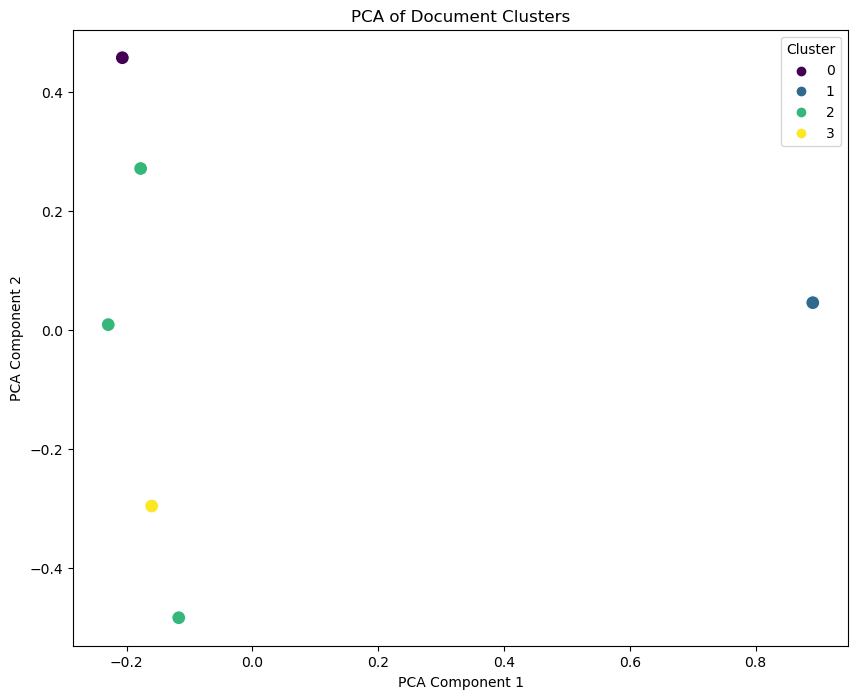

Clustering completed and results saved.


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import threadpoolctl

# Define the input file paths
file_paths = [
    r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Hasil_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
    r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Kesimpulan_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
    r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Landasan_Teori_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
    r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Metode_penelitian_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
    r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\Pendahuluan_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt",
    r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\saran_1995_Kristiana_Hubungan Komitmen profesi dan komitmen organisasi tenaga profesional di bidang teknik-unlocked.txt"
]

# Step 1: Concatenate important sections per document
documents = []
for path in file_paths:
    with open(path, 'r', encoding='utf-8') as file:
        documents.append(file.read())

# Step 2: Preprocess the combined text corpus using TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Step 3: Apply clustering algorithms
n_clusters = 4  # You can adjust this between 3-6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Use threadpool_limits to control the number of threads
with threadpoolctl.threadpool_limits(limits=1, user_api='blas'):
    cluster_labels = kmeans.fit_predict(X)

# Step 4: Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Step 5: Create output directory if it doesn't exist
output_dir = r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\outputs\clustering"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Step 6: Create color-coded cluster plots
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title('PCA of Document Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.savefig(os.path.join(output_dir, 'pca_clusters.png'))  # Save the figure
plt.show()

# Step 7: Export cluster assignments to Excel
cluster_df = pd.DataFrame({'Document': [os.path.basename(path) for path in file_paths], 'Cluster': cluster_labels})
cluster_df.to_excel(r"C:\Users\Jose\Downloads\Research UI\Research UI\Bertina Sjabadhyni\compiled\TXT\1990-2000\cluster_labels.xlsx", index=False)

print("Clustering completed and results saved.")